In [ ]:
import pandas as pd

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
import re

import string
from collections import Counter

In [ ]:
responses = pd.read_csv(r'./Data/formresponses.csv')

In [67]:
records = responses['What are things that make you glad to live in Grinnell?  '].dropna()


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# extract the text data from the "text" column
text_data = records.values

# remove stop words
stop_words = stopwords.words('english')
text_data = [" ".join([word for word in text.split() if word.lower() not in stop_words]) for text in text_data]

#https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76
#https://okan.cloud/posts/2022-01-16-text-vectorization-using-python-tf-idf/

# transform text data into numerical vector
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text_data)

feature_names = vectorizer.get_feature_names()

dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

print(df)


     100  1892  2010  2030   30   35   40  4th  52nd        80  ...  working  \
0    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.000000  ...      0.0   
1    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.000000  ...      0.0   
2    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.227241  ...      0.0   
3    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.000000  ...      0.0   
4    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.000000  ...      0.0   
..   ...   ...   ...   ...  ...  ...  ...  ...   ...       ...  ...      ...   
384  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.000000  ...      0.0   
385  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.000000  ...      0.0   
386  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.000000  ...      0.0   
387  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.000000  ...      0.0   
388  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.000000  ...      0.0   

     works  world     would  written  y

/Users/shrey/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [85]:
# calculate the cosine similarity matrix
cosine_sim = cosine_similarity(vectors)

# cluster the data based on cosine similarity
kmeans = KMeans(n_clusters=3, random_state=0).fit(cosine_sim)

# print the cluster labels
print(kmeans.labels_)
# print(cosine_sim)

[2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2 1 2 2 1 1 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 2 2 1 1 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 0 1 2 1 2 2 1 2 2 2 2
 2 1 2 1 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 0 2 2 2 2 2 2 1 2 2 2 2 1 2 1 2 0 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 0 2 2 2 2 2 2 2 2 2 1 2
 2 2 0 2 2 2 2 1 2 1 2 2 1 2 2 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 0 2 2 1 2 1 2 0 2 2 2 1 2 1 2 2 2 2 2 2 2 0 2 1 2 1 2 1 2 2 2 1 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 0 1 2
 2 1 0 2 2 2 2 0 2 0 1 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2]


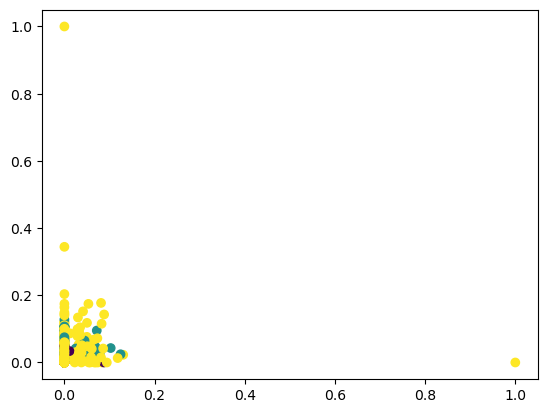

In [86]:
import matplotlib.pyplot as plt

# visualize the clustering results
plt.scatter(cosine_sim[:, 0], cosine_sim[:, 1], c=kmeans.labels_)
plt.show()

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# calculate the pairwise distance matrix
distance_matrix = 1 - np.array(cosine_similarity(vectors))

# apply agglomerative clustering
Z = linkage(distance_matrix, method='ward')
labels = fcluster(Z, t=4, criterion='maxclust')

# print the cluster labels
print(labels)


[4 4 4 3 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 2 4 4
 4 3 4 4 4 4 4 4 4 4 4 4 2 4 4 3 4 3 3 3 4 4 1 4 4 3 3 1 4 4 4 3 4 3 4 3 3
 4 4 4 2 3 2 4 1 4 4 4 2 4 1 4 4 4 3 4 3 4 3 4 4 3 4 2 3 4 3 4 4 3 4 4 4 2
 4 3 3 3 4 3 3 4 3 4 4 4 4 4 4 4 3 4 4 4 3 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4
 4 4 1 4 4 2 4 4 4 4 4 4 3 4 4 4 3 3 4 3 4 2 3 4 4 1 4 2 4 4 4 4 4 4 4 4 3
 4 4 4 4 4 3 4 1 4 4 4 4 3 3 4 4 1 3 3 4 4 3 4 4 4 4 3 4 4 3 4 4 4 4 4 1 4
 4 4 2 4 4 4 4 3 4 4 3 4 3 4 4 2 4 4 2 4 4 2 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3
 4 4 2 4 4 3 3 3 4 2 4 3 3 3 4 3 4 3 4 4 4 4 4 2 4 1 4 1 2 1 4 3 4 3 4 4 3
 4 4 4 3 1 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 3 4 2 1 4
 4 3 2 4 4 4 4 2 4 2 3 2 3 4 4 2 4 4 4 3 4 4 3 4 4 4 4 3 4 4 4 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4]


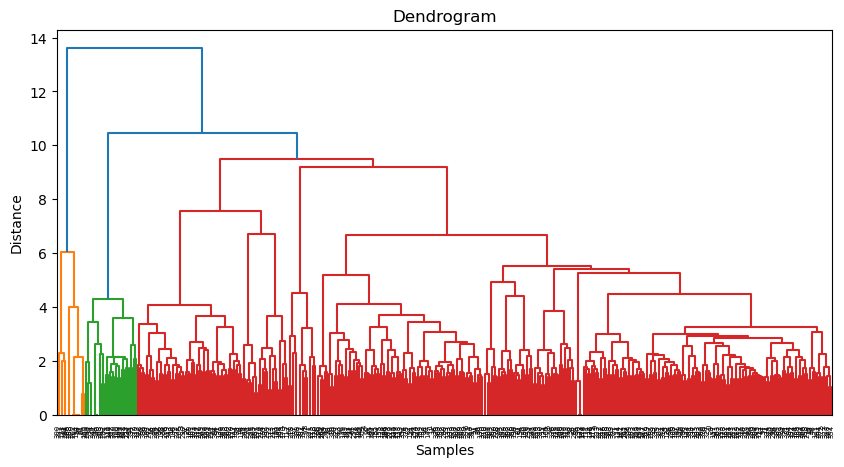

In [95]:

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# create dendrogram
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)

# add labels to the plot
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()